#           CAR PRICING DYNAMICS MODEL

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('datasets_383055_741735_CarPrice_Assignment.csv')

In [3]:
data.head()

,Unnamed: 0,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
pd.set_option('display.max_columns', 90)
pd.set_option('display.max_rows', 200)

In [5]:
data.drop(['car_ID'], axis='columns', inplace=True)

In [6]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
data.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


>Here is the commencement of cleaning the dataset which comes in different phases

   >DATA CLEANING        STAGE 1

>APPLYING LABEL ENCODER ON ALL CATEGORICAL FEATURES

In [8]:
data['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [9]:
data['doornumber'].replace({'two': 2, 'four': 4}, inplace = True)

In [10]:
data['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [11]:
data['aspiration'].replace({'std': 0, 'turbo': 1}, inplace = True)

In [12]:
data['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [13]:
data['drivewheel'].replace({'rwd': 0, 'fwd': 1, '4wd': 2}, inplace = True)

In [14]:
data['carbody'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [15]:
data['carbody'].replace({'convertible': 0, 'hatchback': 1, 'sedan': 2, 'wagon': 3, 'hardtop': 4}, inplace = True)

In [16]:
data['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

In [17]:
data['enginelocation'].replace({'front': 0, 'rear': 1}, inplace = True)

In [18]:
data['enginetype'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [19]:
data['enginetype'].replace({'dohc': 0, 'ohcv': 1, 'ohc': 2, 'l': 3, 'rotor': 4, 'ohcf': 5, 'dohcv': 6}, inplace = True)

In [20]:
data['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [21]:
data['cylindernumber'].replace({'four': 4, 'six': 6, 'five': 5, 'three': 3, 'twelve': 12, 'two': 2, 'eight': 8}, inplace = True)

In [22]:
data['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [23]:
data['fuelsystem'].replace({'mpfi': 0, '2bbl': 1, 'mfi': 2, '1bbl': 3, 'spfi': 4, '4bbl': 5, 'idi': 6, 'spdi': 7}, inplace = True)

In [24]:
data['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [25]:
data['fueltype'].replace({'gas': 0, 'diesel': 1}, inplace = True)

>DATA CLEANING STAGE 2

>This is the process of generating the 'MAKE' and 'MODEL' out of the 'CarName' column

>It is observed that new features 'Make' and 'Model' should be created out of variable 'CarName' to enhance
>exploration on the dataset

In [26]:
name = 'volkswagen model 111'
name.split()

['volkswagen', 'model', '111']

In [27]:
name = 'volkswagen model 111'
name.split()[0]

'volkswagen'

In [28]:
make = lambda name: name.split()[0]

In [29]:
make('volkswagen model 111')   # Here, column 'Make' is generated out of CarName column, looking forward to broadcast it to the entire samples.

'volkswagen'

In [30]:
name = 'volkswagen model 111'    # Here, column 'model' is to be generated
name.split()

['volkswagen', 'model', '111']

In [31]:
name_split = name.split()

In [32]:
name_sl = name_split[1:]

In [33]:
'-'.join(name_sl)

'model-111'

In [34]:
model = lambda name: '-'.join(name.split()[1:])

In [35]:
name = 'volkswagen model 111'

In [36]:
#[name for ind in name '-'join(name.split()[1:])]

In [37]:
model('volkswagen model 111')

'model-111'

In [38]:
model('toyota celica gt liftback')   # Here, cplumn Model is also generated as entire remaining CarName after Make column is generated

'celica-gt-liftback'

In [39]:
data['Make'] = data['CarName'].apply(make)     # Lambda function om make is broadcasted on entire CarName column

In [40]:
data['Model'] = data['CarName'].apply(model)    # Lambda function om model is broadcasted on entire CarName column

In [41]:
data['Make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [42]:
data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Make,Model
0,3,alfa-romero giulia,0,0,2,0,0,0,88.6,168.8,64.1,48.8,2548,0,4,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,3,alfa-romero stelvio,0,0,2,0,0,0,88.6,168.8,64.1,48.8,2548,0,4,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,1,alfa-romero Quadrifoglio,0,0,2,1,0,0,94.5,171.2,65.5,52.4,2823,1,6,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,2,audi 100 ls,0,0,4,2,1,0,99.8,176.6,66.2,54.3,2337,2,4,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100-ls
4,2,audi 100ls,0,0,4,2,2,0,99.4,176.6,66.4,54.3,2824,2,5,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [72]:
data.tail(20)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Make,Model
185,2,volkswagen type 3,0,0,4,2,1,0,97.3,171.7,65.5,55.7,2212,2,4,109,0,3.19,3.40,9.0,85,5250,27,34,8195.0,volkswagen,type-3
186,2,volkswagen 411 (sw),0,0,4,2,1,0,97.3,171.7,65.5,55.7,2275,2,4,109,0,3.19,3.40,9.0,85,5250,27,34,8495.0,volkswagen,411-(sw)
187,2,volkswagen super beetle,1,1,4,2,1,0,97.3,171.7,65.5,55.7,2319,2,4,97,6,3.01,3.40,23.0,68,4500,37,42,9495.0,volkswagen,super-beetle
188,2,volkswagen dasher,0,0,4,2,1,0,97.3,171.7,65.5,55.7,2300,2,4,109,0,3.19,3.40,10.0,100,5500,26,32,9995.0,volkswagen,dasher
189,3,vw dasher,0,0,2,0,1,0,94.5,159.3,64.2,55.6,2254,2,4,109,0,3.19,3.40,8.5,90,5500,24,29,11595.0,volkswagen,dasher
190,3,vw rabbit,0,0,2,1,1,0,94.5,165.7,64.0,51.4,2221,2,4,109,0,3.19,3.40,8.5,90,5500,24,29,9980.0,volkswagen,rabbit
191,0,volkswagen rabbit,0,0,4,2,1,0,100.4,180.2,66.9,55.1,2661,2,5,136,0,3.19,3.40,8.5,110,5500,19,24,13295.0,volkswagen,rabbit
192,0,volkswagen rabbit custom,1,1,4,2,1,0,100.4,180.2,66.9,55.1,2579,2,4,97,6,3.01,3.40,23.0,68,4500,33,38,13845.0,volkswagen,rabbit-custom
193,0,volkswagen dasher,0,0,4,3,1,0,100.4,183.1,66.9,55.1,2563,2,4,109,0,3.19,3.40,9.0,88,5500,25,31,12290.0,volkswagen,dasher
194,-2,volvo 145e (sw),0,0,4,2,0,0,104.3,188.8,67.2,56.2,2912,2,4,141,0,3.78,3.15,9.5,114,5400,23,28,12940.0,volvo,145e-(sw)


In [44]:
data.corr()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.194311,-0.059866,-0.664073,-0.398970,0.041671,0.212471,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,0.015797,-0.113129,-0.105790,0.016678,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
fueltype,-0.194311,1.000000,0.401397,0.191491,0.157580,-0.132257,-0.040070,0.308346,0.212679,0.233880,0.284631,0.217275,0.028837,-0.024544,0.069594,0.682404,0.054451,0.241829,0.984356,-0.163926,-0.476883,0.255963,0.191392,0.105679
aspiration,-0.059866,0.401397,1.000000,0.031792,0.021276,-0.066465,-0.057191,0.257611,0.234539,0.300567,0.087311,0.324902,0.014505,-0.047972,0.108217,0.473355,0.212614,0.222982,0.295541,0.241685,-0.183383,-0.202362,-0.254416,0.177926
doornumber,-0.664073,0.191491,0.031792,1.000000,0.447534,0.098954,-0.137757,0.447357,0.398568,0.207168,0.552208,0.197379,0.037170,-0.016009,0.020742,-0.017936,0.119258,-0.011082,0.177888,-0.126947,-0.247668,-0.012417,-0.036330,0.031835
carbody,-0.398970,0.157580,0.021276,0.447534,1.000000,-0.056886,0.126546,0.368772,0.376842,0.191511,0.483675,0.240367,0.127736,0.106245,0.172381,-0.054724,0.224976,0.000598,0.156686,0.047234,-0.147031,-0.095826,-0.126939,0.161294
drivewheel,0.041671,-0.132257,-0.066465,0.098954,-0.056886,1.000000,-0.147865,-0.459745,-0.485649,-0.470751,0.019719,-0.575111,0.192637,-0.314006,-0.524307,0.036437,-0.481827,-0.071591,-0.127479,-0.518686,0.039417,0.449581,0.452220,-0.577992
enginelocation,0.212471,-0.040070,-0.057191,-0.137757,0.126546,-0.147865,1.000000,-0.187790,-0.050989,-0.051698,-0.106234,0.050468,0.323697,0.183048,0.196826,-0.082672,0.185042,-0.138455,-0.019762,0.317839,0.198461,-0.153487,-0.102026,0.324973
wheelbase,-0.531954,0.308346,0.257611,0.447357,0.368772,-0.459745,-0.187790,1.000000,0.874587,0.795144,0.589435,0.776386,-0.136452,0.339507,0.569329,0.004828,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.212679,0.234539,0.398568,0.376842,-0.485649,-0.050989,0.874587,1.000000,0.841118,0.491029,0.877728,-0.172093,0.430672,0.683360,-0.090618,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.233880,0.300567,0.207168,0.191511,-0.470751,-0.051698,0.795144,0.841118,1.000000,0.279210,0.867032,-0.098253,0.545007,0.735433,-0.017121,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325


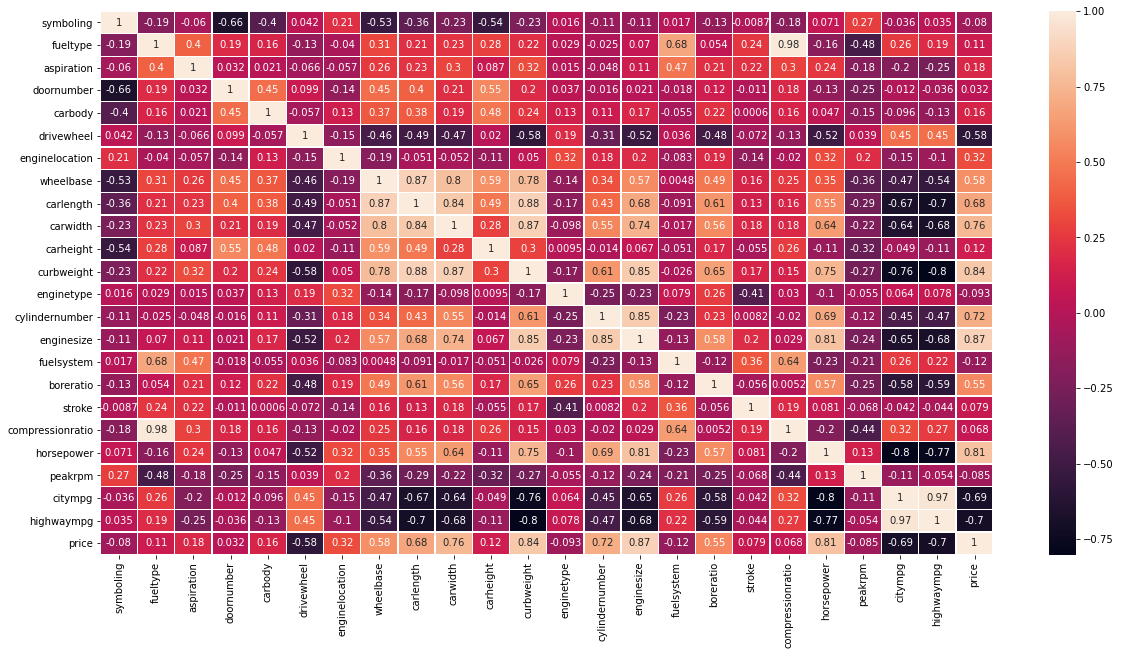

In [45]:
plt.figure(figsize = (20, 10))
sns.heatmap(data.corr(), annot = True, linewidth = 0.5)

>Inference From Correlation Graph:
    1. The correlation graph above indicates some features are positively correlated with price, such as 
       horsepower, enginesize etc.
    2. It also indicates some features are negatively correlated with price, such as citympg, highwaympg etc.
    3. Some features as well have negligible correlation with price e.g carheight and stroke

In [ ]:
sns.pairplot(data)

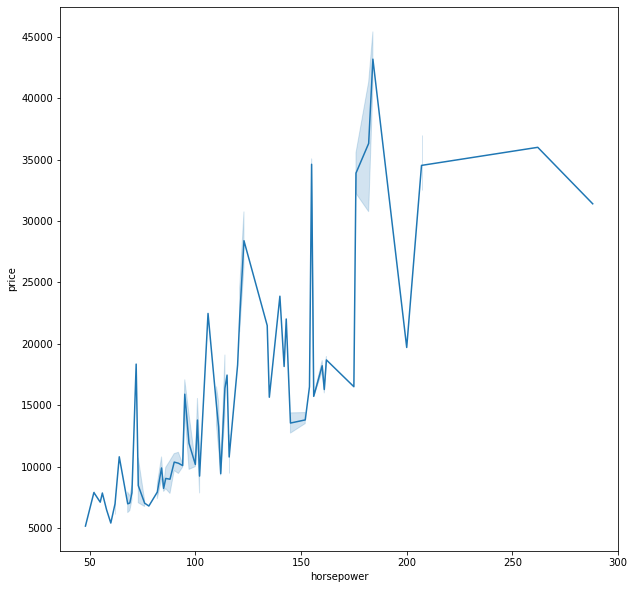

In [46]:
plt.figure(figsize=(10,10))
sns.lineplot(x='horsepower', y='price', data = data)
plt.show()

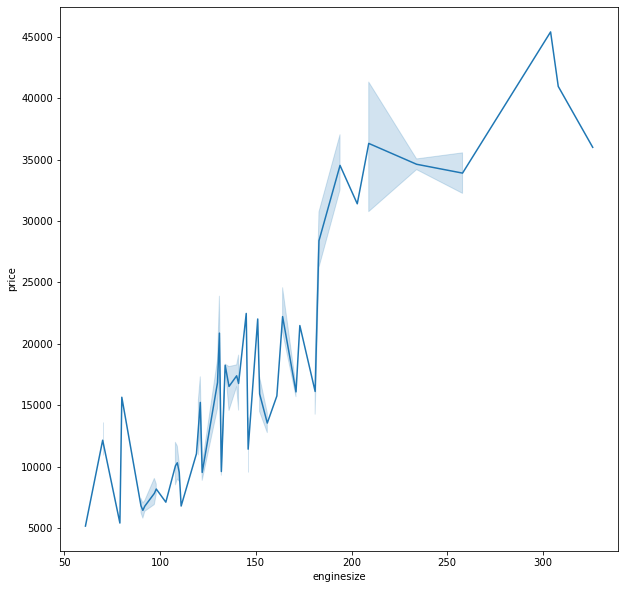

In [47]:
plt.figure(figsize=(10,10))
sns.lineplot(x='enginesize', y='price', data = data)
plt.show()

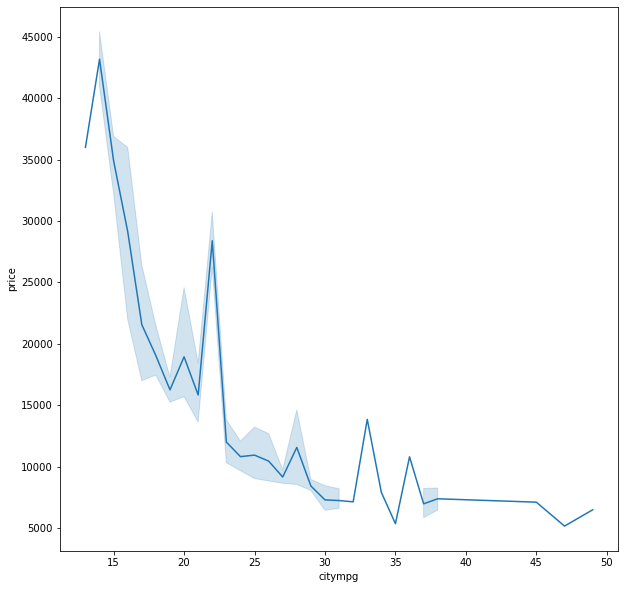

In [48]:
plt.figure(figsize=(10,10))
sns.lineplot(x='citympg', y='price', data = data)

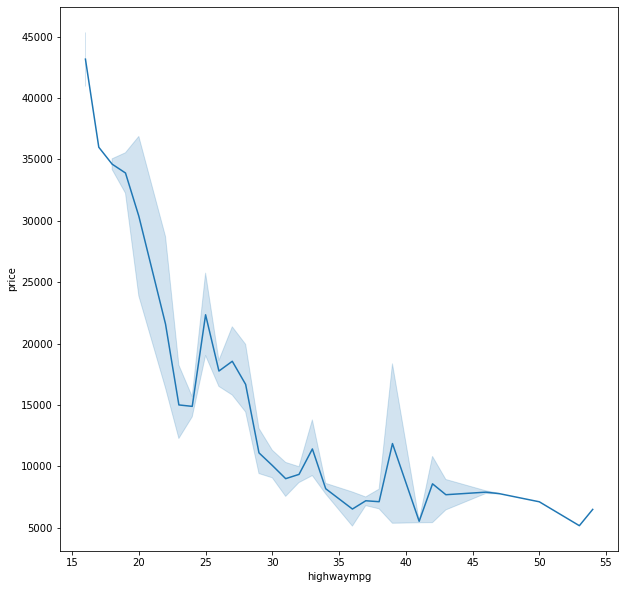

In [49]:
plt.figure(figsize=(10,10))
sns.lineplot(x='highwaympg', y='price', data = data)

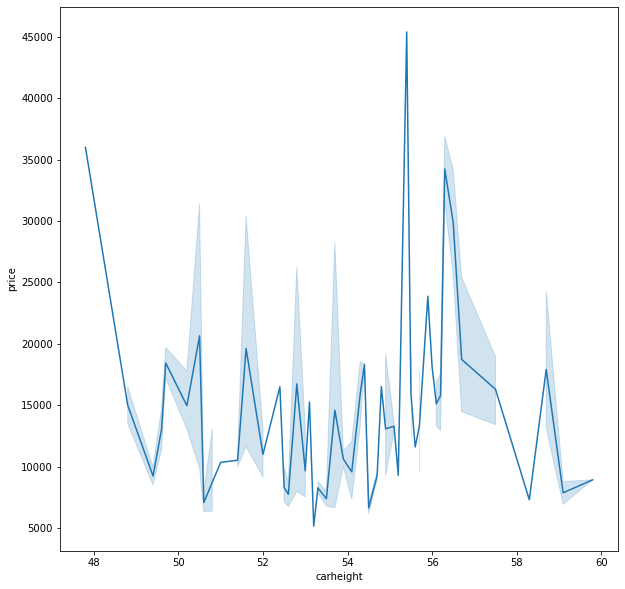

In [50]:
plt.figure(figsize=(10,10))
sns.lineplot(x='carheight', y='price', data = data)

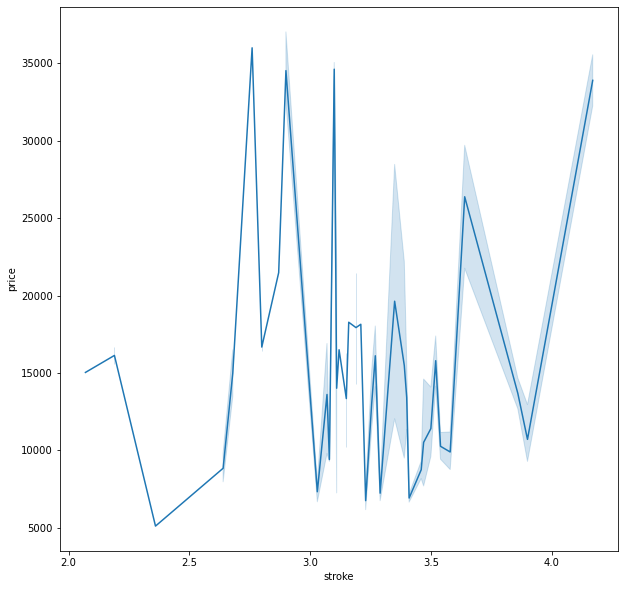

In [51]:
plt.figure(figsize=(10,10))
sns.lineplot(x='stroke', y='price', data = data)

In [60]:
len(data['Make'].unique())

22

In [63]:
ModelNo = len(data['Model'].unique())

In [64]:
ModelNo

142

In [70]:
ModelGroup = data.groupby('Model')

>The following is a correction on misspelled CarNames

In [52]:
data.Make = data.Make.str.lower()

def replace_name(a,b):
    data.Make.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')
replace_name('alfa-romero', 'alfa-romeo')

In [53]:
data.Make.unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

[Text(0, 0.5, 'Frequency of Make'), Text(0.5, 0, 'Make')]

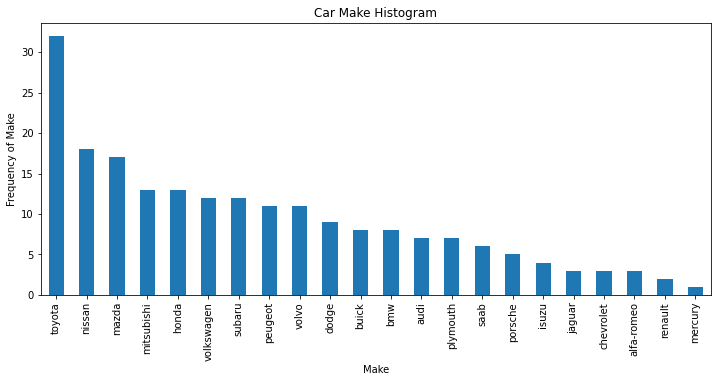

In [54]:
plt.figure(figsize=(12, 5))

plt.plot(1,3,1)
plt1 = data.Make.value_counts().plot(kind='bar')
plt.title('Car Make Histogram')
plt1.set(xlabel = 'Make', ylabel='Frequency of Make')

[Text(0, 0.5, 'Frequency of fuel type'), Text(0.5, 0, 'fueltype')]

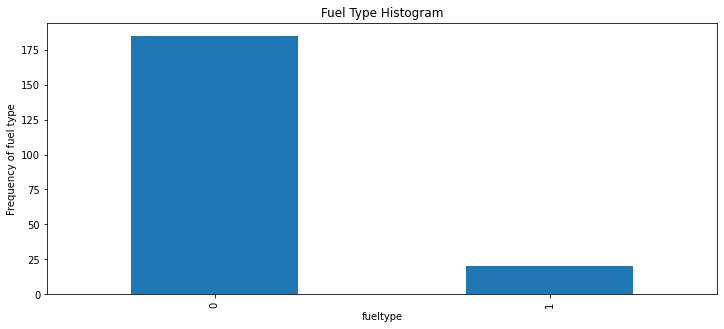

In [55]:
plt.figure(figsize=(12, 5))
plt.plot(1,3,2)
plt1 = data.fueltype.value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'fueltype', ylabel='Frequency of fuel type')

[Text(0, 0.5, 'Frequency of model type'), Text(0.5, 0, 'Model')]

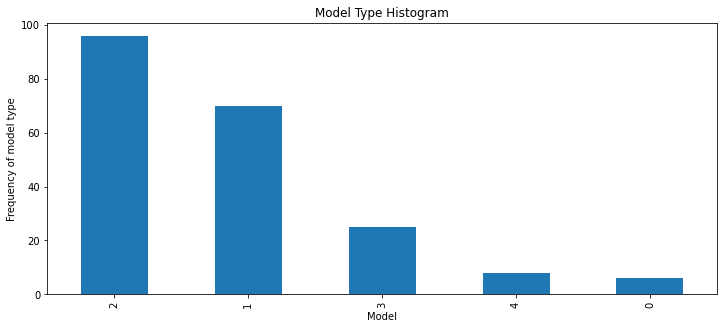

In [56]:
plt.figure(figsize=(12, 5))
plt.plot(1,3,3)
plt1 = data.carbody.value_counts().plot(kind='bar')
plt.title('Model Type Histogram')
plt1.set(xlabel = 'Model', ylabel='Frequency of model type')

In [57]:
data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Make,Model
0,3,alfa-romero giulia,0,0,2,0,0,0,88.6,168.8,64.1,48.8,2548,0,4,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romeo,giulia
1,3,alfa-romero stelvio,0,0,2,0,0,0,88.6,168.8,64.1,48.8,2548,0,4,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romeo,stelvio
2,1,alfa-romero Quadrifoglio,0,0,2,1,0,0,94.5,171.2,65.5,52.4,2823,1,6,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romeo,Quadrifoglio
3,2,audi 100 ls,0,0,4,2,1,0,99.8,176.6,66.2,54.3,2337,2,4,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100-ls
4,2,audi 100ls,0,0,4,2,2,0,99.4,176.6,66.4,54.3,2824,2,5,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [73]:
data.drop(['CarName', 'Model', 'Make'], axis=1, inplace = True)

In [74]:
x = data.drop('price', axis = 1)
y = data[['price']]

In [75]:
from sklearn.model_selection import train_test_split as tts

In [76]:
# Split the dataset to training and testing dataset

x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.30, random_state = 1)

In [77]:
len(x)     # Total length of rows for the independent variables

205

In [78]:
len(x_train)  # 70% for train independent variable

143

In [79]:
len(x) * 0.7

143.5

In [80]:
len(x_test)   # 30% for the test independent variable

62

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
sc = StandardScaler()

In [83]:
#sc.fit(x_train)
x_train_std = sc.fit_transform(x_train)
x_test_std = sc.fit_transform(x_test)

In [84]:
len(x_train)

143

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
sds = StandardScaler()

In [87]:
sds.fit(x_train)
x_train_std = sds.transform(x_train)
x_test_std = sds.transform(x_test)

In [88]:
x_train_std

array([[ 1.69785729, -0.31622777,  2.1725561 , ..., -0.28348454,
        -0.90919255, -0.94885315],
       [-1.42488988, -0.31622777, -0.46028731, ...,  0.15476724,
        -0.90919255, -0.94885315],
       [-0.64420309, -0.31622777, -0.46028731, ..., -0.72173632,
         0.34245159,  0.25058111],
       ...,
       [ 1.69785729, -0.31622777, -0.46028731, ..., -0.83129926,
        -1.3785591 , -1.84842885],
       [ 0.91717049, -0.31622777, -0.46028731, ..., -1.59823987,
         0.18599607,  0.10065183],
       [-0.64420309, -0.31622777, -0.46028731, ...,  1.46952256,
         0.34245159,  0.40051039]])

In [89]:
x_test_std

array([[ 0.91717049, -0.31622777, -0.46028731, ...,  0.8121449 ,
         0.96827365,  1.1501568 ],
       [ 0.1364837 , -0.31622777, -0.46028731, ...,  0.15476724,
         0.96827365,  1.00022752],
       [ 0.1364837 , -0.31622777, -0.46028731, ..., -0.72173632,
         0.96827365,  1.1501568 ],
       ...,
       [ 0.1364837 , -0.31622777, -0.46028731, ..., -0.72173632,
         0.65536262,  0.55043967],
       [ 1.69785729, -0.31622777, -0.46028731, ...,  1.90777434,
        -1.22210358, -1.09878243],
       [-1.42488988, -0.31622777, -0.46028731, ..., -2.03649165,
         0.34245159,  0.25058111]])

In [90]:
# Create an instance for our model
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()

# Fit the model
regression_model.fit(x_train, y_train)  #This is a stage of training the algorithm with datasets, both features and the target.

LinearRegression()

In [ ]:
X= df.loc[:,2:].values
y = df.loc[:,1:].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes